In [22]:
import numpy as np
import pandas as pd
import seaborn as sns # libreria utile per matrice di confusione

from collections import Counter
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import glob

In [53]:
plt.rcParams.update({'font.size': 28, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [24]:
path = '../dataset full/'
dataset_path = glob.glob(path+"/dataset*.csv")[0]
target_path = glob.glob(path+"/target*.csv")[0]
dataset_full = pd.read_csv(dataset_path, header = 0)

# leggo il dataset ed il target

target = pd.read_csv(target_path, header = 0)

dataset = pd.concat([dataset_full,target],axis=1).drop_duplicates(subset='address')

In [25]:
all_features_names = {'balance': 'Balance',
 'lifetime': 'Lifetime',
 'tx_in': 'Tx_in',
 'tx_out': 'Tx_out',
 'investment_in': 'Investment_in',
 'payment_out': 'Payment_out',
 'investment_to_contract/tx_in': 'Investment_in/Tx_in',
 'payment_from_contract/tx_out': 'Payment_out/Tx_out',
 '#addresses_paying_contract': '#addresses_paying_contract',
 '#addresses_paid_by_contract': '#addresses_paid_by_contract',
 'mean_v1': 'Mean_v1',
 'sdev_v1': 'Sdev_v1',
 'mean_v2': 'Mean_v2',
 'sdev_v2': 'Sdev_v2',
 'paid_rate': 'Paid_rate',
 'paid_one': 'Paid_one',
 'percentage_some_tx_in': 'Percentage_some_tx_in',
 'sdev_tx_in': 'Sdev_tx_in',
 'percentage_some_tx_out': 'Percentage_some_tx_out',
 'sdev_tx_out': 'Sdev_tx_out',
 'known_rate': 'Known_rate',
 'owner_gets_eth_Wo_investing': 'Initiator_gets_eth_Wo_investing',
 'owner_gets_eth_investing': 'Initiator_gets_eth_investing',
 'owner_no_eth': 'Initiator_no_eth',
 'skew_v1': 'Skew_v1',
 'N_maxpayment': 'N_maxpayment',
 'skew_v2': 'Skew_v2'
}

In [26]:
dataset.rename(columns=all_features_names,inplace=True)

In [27]:
dist_columns = []
binary_columns = []
for c in dataset.columns[1:-1]:
    n_values = dataset[c].nunique()
    if n_values > 2:
        dist_columns.append(c)
    else:
        binary_columns.append(c)

In [28]:
dist_columns

['Balance',
 'Lifetime',
 'Tx_in',
 'Tx_out',
 'Investment_in',
 'Payment_out',
 'Investment_in/Tx_in',
 'Payment_out/Tx_out',
 '#addresses_paying_contract',
 '#addresses_paid_by_contract',
 'Mean_v1',
 'Sdev_v1',
 'Mean_v2',
 'Sdev_v2',
 'Paid_rate',
 'Paid_one',
 'Percentage_some_tx_in',
 'Sdev_tx_in',
 'Percentage_some_tx_out',
 'Sdev_tx_out',
 'Known_rate',
 'Skew_v1',
 'N_maxpayment',
 'Skew_v2']

In [29]:
binary_columns

['Initiator_gets_eth_Wo_investing',
 'Initiator_gets_eth_investing',
 'Initiator_no_eth']

In [30]:
df = dataset.copy()

In [31]:
df['Class'] = df.target.apply(lambda x: 'Ponzi' if x==1 else 'Not Ponzi' )

count    4.422000e+03
mean     8.297772e+02
std      4.105474e+04
min     -2.587792e+01
0%      -2.587792e+01
1%       0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
95%      2.519978e+00
99%      3.986163e+02
100%     2.711505e+06
max      2.711505e+06
Name: Balance, dtype: float64


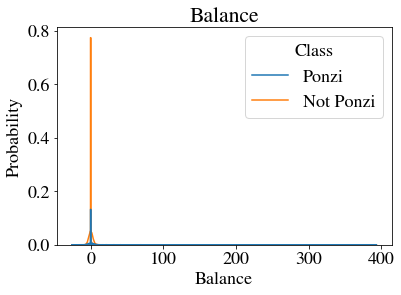

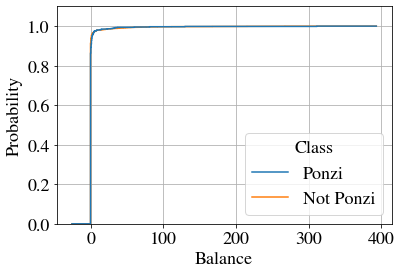

count    4422.000000
mean      253.754184
std       445.664867
min       -12.000000
0%        -12.000000
1%          0.000000
25%         1.000000
50%        39.000000
75%       229.750000
95%      1400.000000
99%      1658.000000
100%     2358.000000
max      2358.000000
Name: Lifetime, dtype: float64


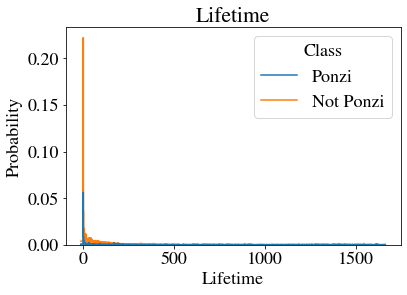

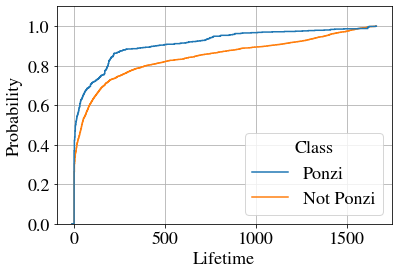

count     4422.000000
mean      1726.028042
std       3373.730293
min          1.000000
0%           1.000000
1%           2.000000
25%          5.000000
50%         33.000000
75%        764.250000
95%       9865.950000
99%       9997.000000
100%     19485.000000
max      19485.000000
Name: Tx_in, dtype: float64


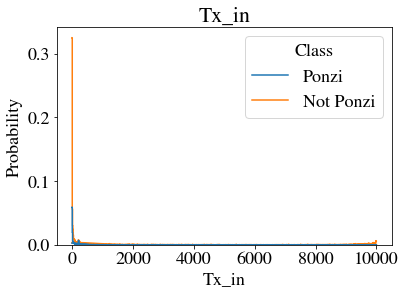

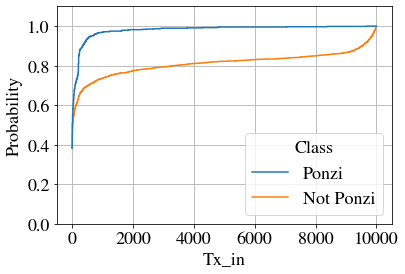

count     4422.000000
mean       187.258933
std       1049.945813
min          0.000000
0%           0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%          5.000000
95%        531.350000
99%       6349.580000
100%     10000.000000
max      10000.000000
Name: Tx_out, dtype: float64


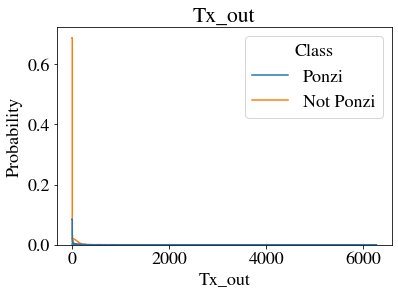

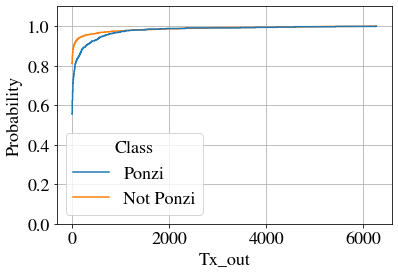

count     4422.000000
mean       177.863184
std        884.673157
min          0.000000
0%           0.000000
1%           0.000000
25%          0.000000
50%          1.000000
75%          9.000000
95%        653.250000
99%       4929.110000
100%     14050.000000
max      14050.000000
Name: Investment_in, dtype: float64


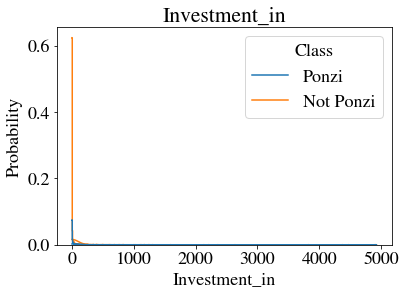

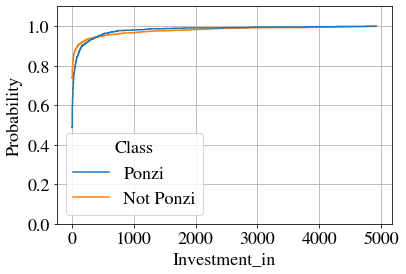

count    4422.000000
mean      170.712121
std       985.055166
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         4.750000
95%       473.750000
99%      5873.710000
100%     9998.000000
max      9998.000000
Name: Payment_out, dtype: float64


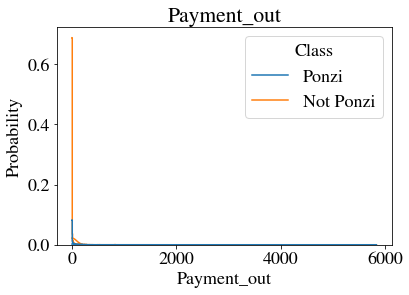

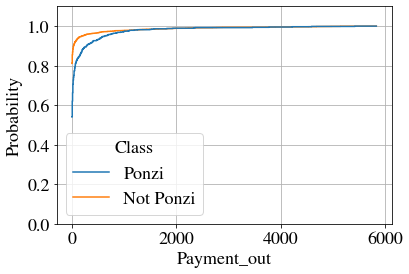

count    4422.000000
mean        0.245858
std         0.330519
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000600
75%         0.500000
95%         0.961500
99%         0.998000
100%        1.000000
max         1.000000
Name: Investment_in/Tx_in, dtype: float64


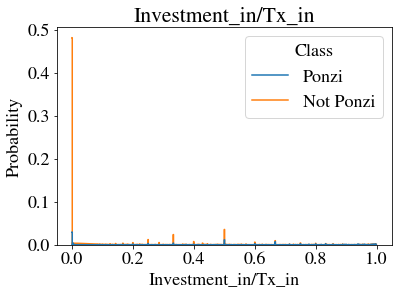

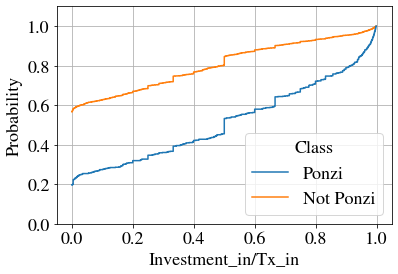

count    4422.000000
mean        0.437820
std         0.491178
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         1.000000
95%         1.000000
99%         1.000000
100%        1.000000
max         1.000000
Name: Payment_out/Tx_out, dtype: float64


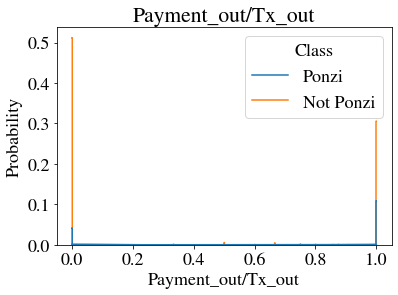

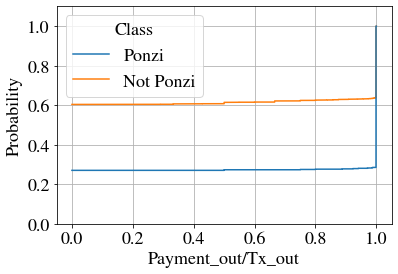

count    4422.000000
mean       69.220036
std       399.141806
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         1.000000
75%         4.000000
95%       200.950000
99%      1875.160000
100%     7522.000000
max      7522.000000
Name: #addresses_paying_contract, dtype: float64


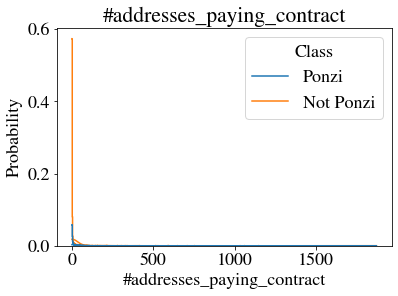

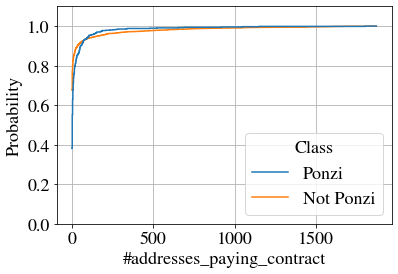

count    4422.000000
mean       27.788105
std       361.418833
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         1.000000
95%        33.000000
99%       371.270000
100%     9635.000000
max      9635.000000
Name: #addresses_paid_by_contract, dtype: float64


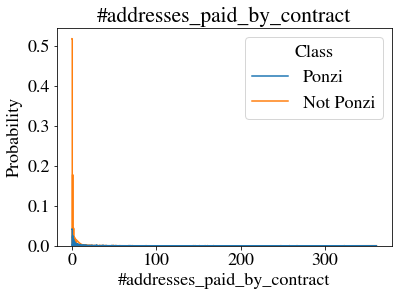

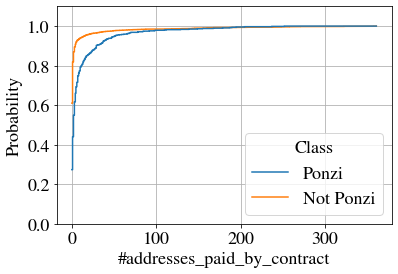

count    4422.000000
mean       -2.534626
std        64.872255
min     -3331.666667
0%      -3331.666667
1%        -12.895000
25%         0.000000
50%         0.000000
75%         0.000000
95%         2.000000
99%        11.300464
100%      653.666667
max       653.666667
Name: Mean_v1, dtype: float64


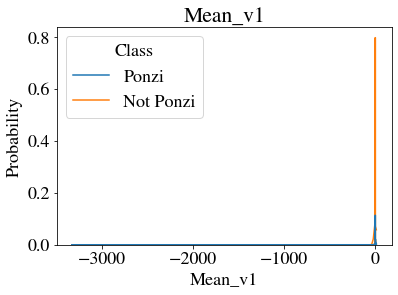

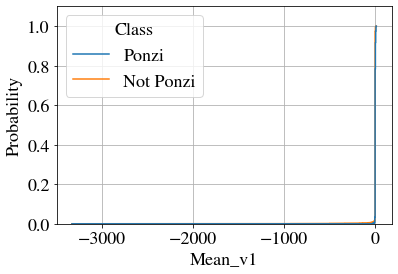

count    4422.000000
mean       10.992953
std       114.152134
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         1.247219
95%        24.921938
99%       179.165858
100%     4711.688256
max      4711.688256
Name: Sdev_v1, dtype: float64


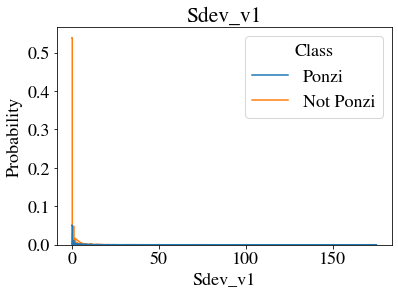

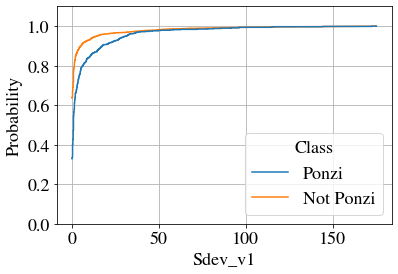

count     4422.000000
mean       -15.488011
std        639.789537
min     -36929.865922
0%      -36929.865922
1%          -4.143226
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
99%          0.000000
100%         0.144569
max          0.144569
Name: Mean_v2, dtype: float64


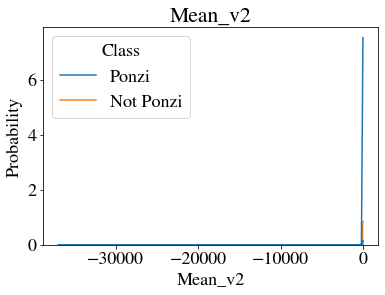

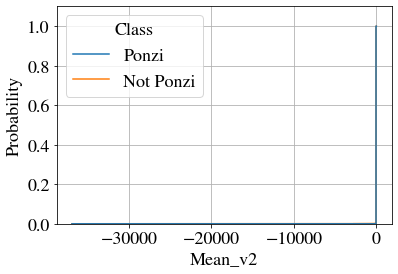

count    4.422000e+03
mean     1.144199e+03
std      3.716480e+04
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.192343e-01
95%      3.007473e+02
99%      9.788914e+03
100%     2.227807e+06
max      2.227807e+06
Name: Sdev_v2, dtype: float64


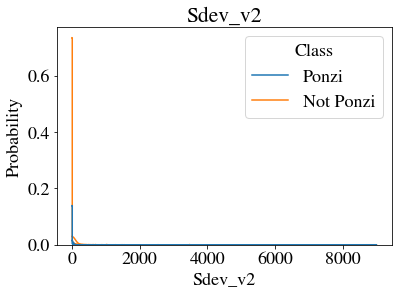

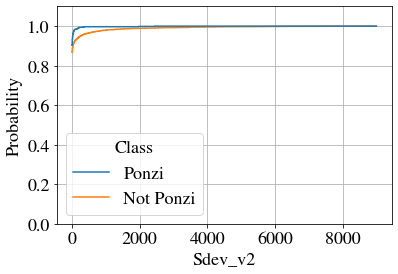

count    4422.000000
mean        1.338134
std        24.274382
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         1.000000
95%         2.199645
99%         5.500000
100%     1385.000000
max      1385.000000
Name: Paid_rate, dtype: float64


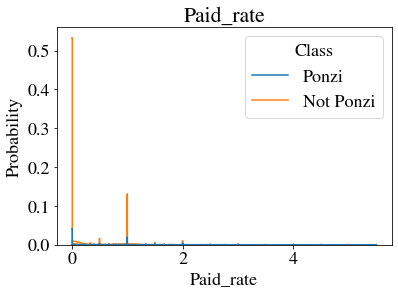

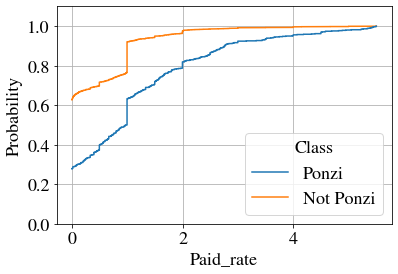

count    4422.000000
mean        0.190958
std         0.348180
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         0.205200
95%         1.000000
99%         1.000000
100%        1.000000
max         1.000000
Name: Paid_one, dtype: float64


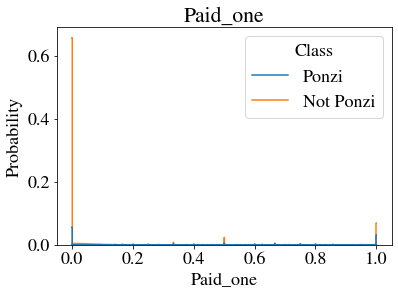

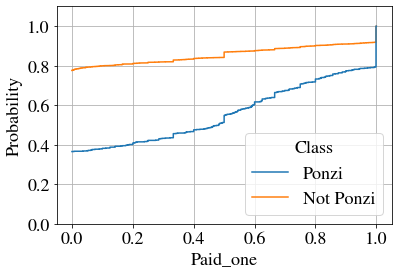

count    4422.000000
mean        0.847071
std         6.970139
min         0.000700
0%          0.000700
1%          0.003421
25%         0.105300
50%         0.571900
75%         1.000000
95%         2.000000
99%         2.606883
100%      426.000000
max       426.000000
Name: Percentage_some_tx_in, dtype: float64


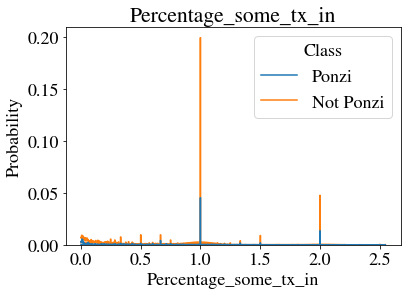

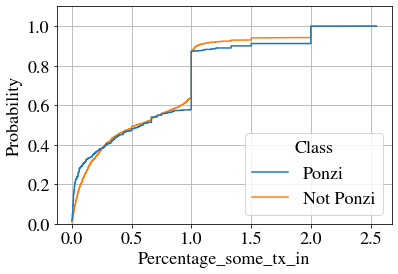

count    4422.000000
mean       98.926909
std       374.806049
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         2.511507
75%        34.216372
95%       475.395015
99%      1804.307845
100%     4997.000000
max      4997.000000
Name: Sdev_tx_in, dtype: float64


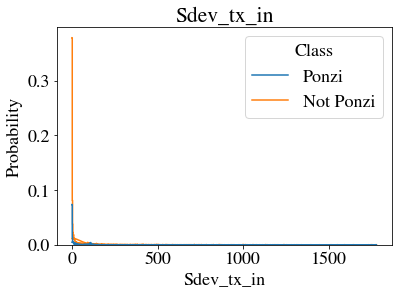

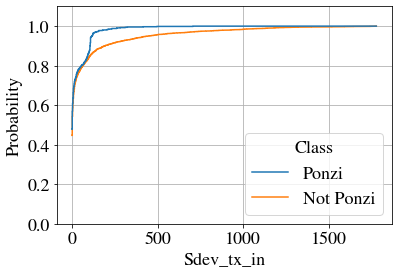

count    4422.000000
mean        0.226272
std         0.427308
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         0.172925
95%         1.000000
99%         2.000000
100%        2.000000
max         2.000000
Name: Percentage_some_tx_out, dtype: float64


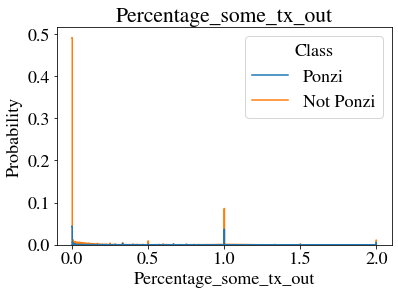

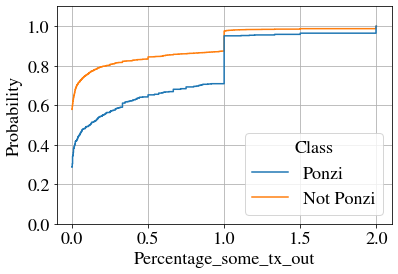

count    4422.000000
mean       13.094556
std       117.730781
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%        25.714731
99%       286.693760
100%     4123.000000
max      4123.000000
Name: Sdev_tx_out, dtype: float64


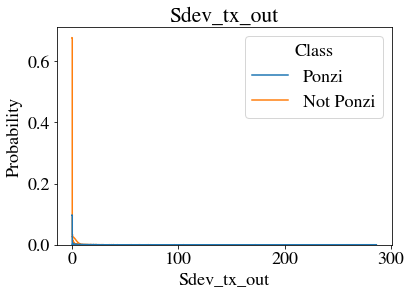

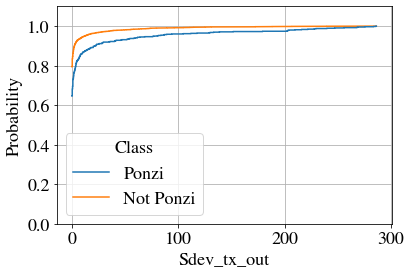

count    4422.000000
mean        0.310418
std         0.444240
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         0.987675
95%         1.000000
99%         1.000000
100%        1.000000
max         1.000000
Name: Known_rate, dtype: float64


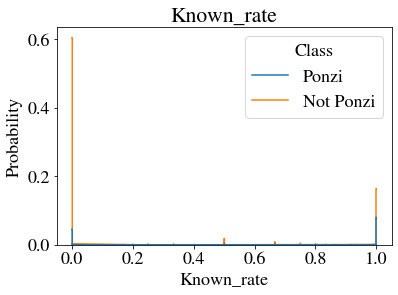

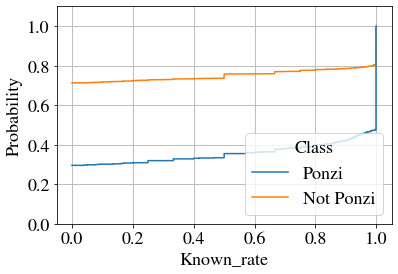

count    4422.000000
mean        1.014229
std         6.017357
min       -47.146951
0%        -47.146951
1%         -6.363704
25%         0.000000
50%         0.000000
75%         0.000000
95%         6.334994
99%        29.788898
100%       80.308237
max        80.308237
Name: Skew_v1, dtype: float64


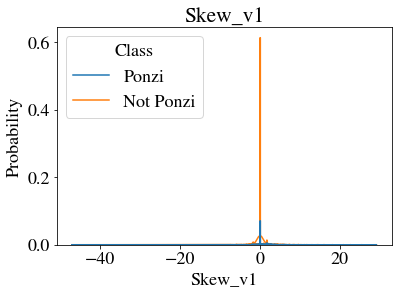

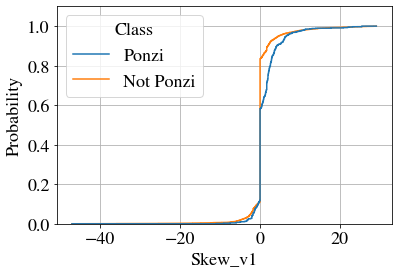

count    4422.000000
mean       76.700814
std       497.402537
min         0.000000
0%          0.000000
1%          0.000000
25%         0.000000
50%         0.000000
75%         3.000000
95%       137.950000
99%      2524.850000
100%     9711.000000
max      9711.000000
Name: N_maxpayment, dtype: float64


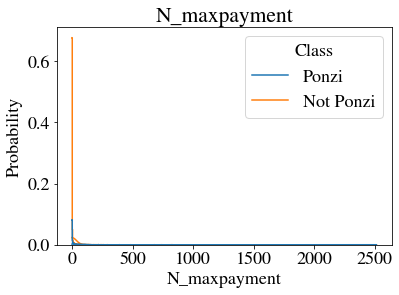

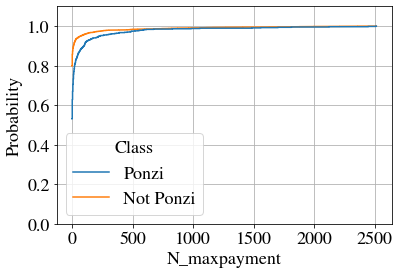

count    4422.000000
mean        1.300121
std         7.397722
min       -94.810574
0%        -94.810574
1%         -6.106645
25%         0.000000
50%         0.000000
75%         0.000000
95%         8.803646
99%        36.832140
100%       79.279103
max        79.279103
Name: Skew_v2, dtype: float64


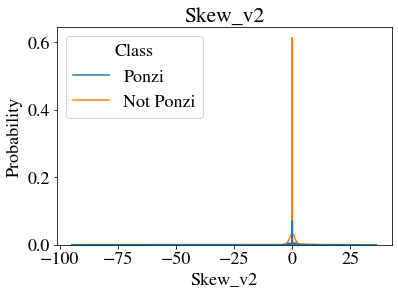

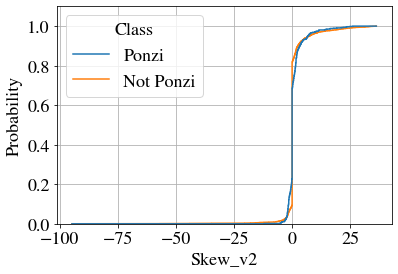

In [32]:
for c in dist_columns:
    describe = df[c].describe(percentiles=[0,0.01,.25,.5,.75,.95,.99,1])
    print(describe)
    th_high = describe[describe.index=='99%'].values
    th_low = describe[describe.index=='1%'].values
#     mask = (df[c] >= th_low[0])&
    mask = (df[c] <= th_high[0])
    _tmp = df[mask]
#     df[df[c] < th[0]][c].hist(bins=100)
    binwidth = (_tmp[c].max() - _tmp[c].min()) / 1000
   
    sns.histplot(data=_tmp,x=c,hue='Class',\
             stat="probability",fill=False,element='step',\
            binwidth=binwidth,kde=True)

    
    plt.title(c)
    plt.show()
    binwidth = (_tmp[c].max() - _tmp[c].min()) / 1000
    sns.histplot(data=_tmp,x=c,hue='Class',\
             stat="probability",common_norm=False,\
             cumulative=True,fill=False,element='step',\
            binwidth=binwidth)
    plt.ylim([0,1.1])
    plt.xlabel(c,fontsize=18)
    plt.ylabel('Probability', fontsize=18)
    plt.savefig('{}_cumulative.png'.format(c.replace('/','-')))
    plt.grid()
    plt.show()


In [33]:
binary_columns

['Initiator_gets_eth_Wo_investing',
 'Initiator_gets_eth_investing',
 'Initiator_no_eth']

In [40]:
c = b
gb = df.groupby(['target',c],as_index=False).agg({'address':'count'})
gb['ticks'] = gb[c].apply(lambda x: '{}=1'.format(c) if x == 1 else '{}=0'.format(c) )
    

In [46]:
gb_target = df.groupby(['target'],as_index=False).agg({'address':'count'})
gb_target.rename(columns={'address':'total'},inplace=True)

In [34]:
def create_df_bar(df,c):
    gb = df.groupby(['target',c],as_index=False).agg({'address':'count'})
    gb['ticks'] = gb[c].apply(lambda x: '{}=1'.format(c) if x == 1 else '{}=0'.format(c) )
    return gb[['target','ticks','address']]

In [35]:
list_of_gbs = []
for b in binary_columns:
    print(b)
    list_of_gbs.append(create_df_bar(df,b))

Initiator_gets_eth_Wo_investing
Initiator_gets_eth_investing
Initiator_no_eth


In [36]:
gbs = pd.concat(list_of_gbs)

In [47]:
gbs_merged = pd.merge(gbs,gb_target,on='target')

In [49]:
gbs_merged['percentage'] = gbs_merged['address']/gbs_merged['total']*100

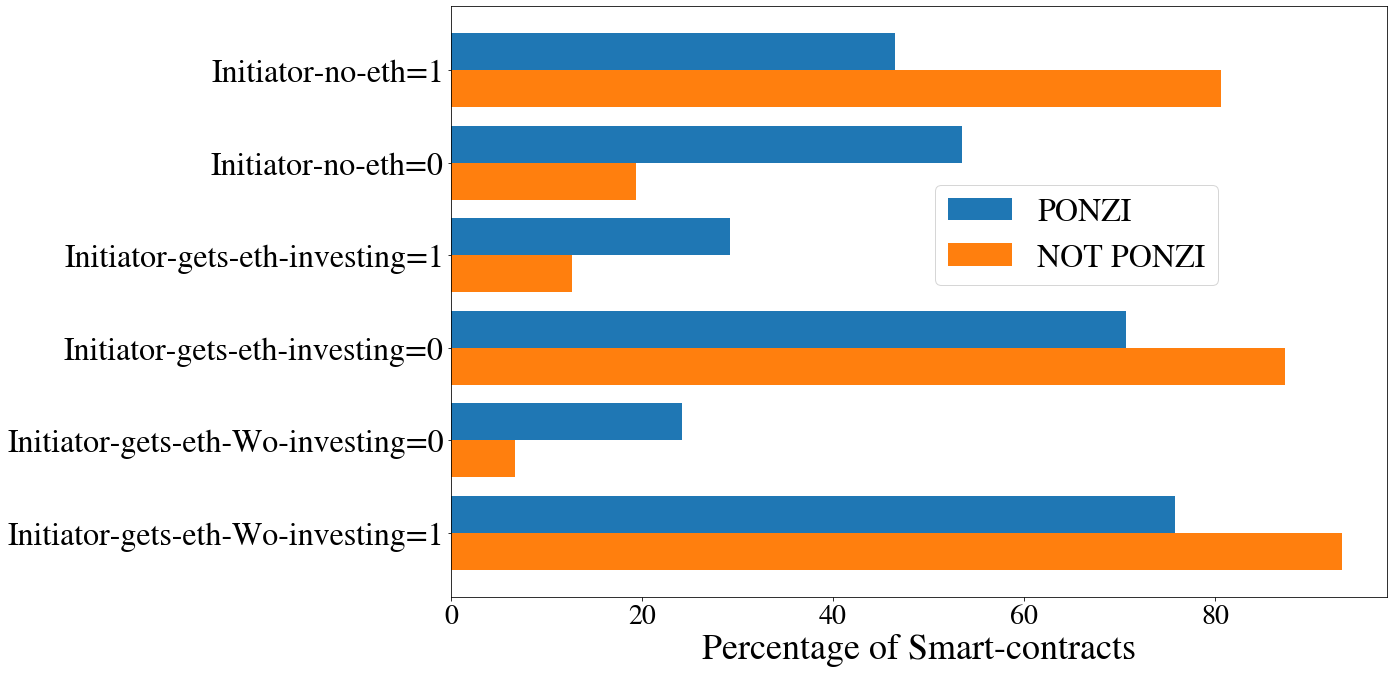

In [54]:
plt.figure(figsize=(20,10))
plt.barh(y=range(0,len(gbs_merged[gbs_merged.target==1])),width = gbs_merged[gbs_merged.target==1].percentage, height =0.4,align='edge',label='PONZI')
plt.barh(y=range(0,len(gbs_merged[gbs_merged.target==0])),width = gbs_merged[gbs_merged.target==0].percentage, height =-0.4,align='edge',label='NOT PONZI')
plt.legend(loc='best',fontsize=32,bbox_to_anchor=(0.5,0.5))
plt.yticks([0,1,2,3,4,5],['Initiator-gets-eth-Wo-investing=1','Initiator-gets-eth-Wo-investing=0','Initiator-gets-eth-investing=0','Initiator-gets-eth-investing=1','Initiator-no-eth=0','Initiator-no-eth=1'],fontsize=32)
plt.xticks(fontsize=28)
plt.xlabel('Percentage of Smart-contracts',fontsize=36)
plt.tight_layout()
plt.savefig('binary_features.png')

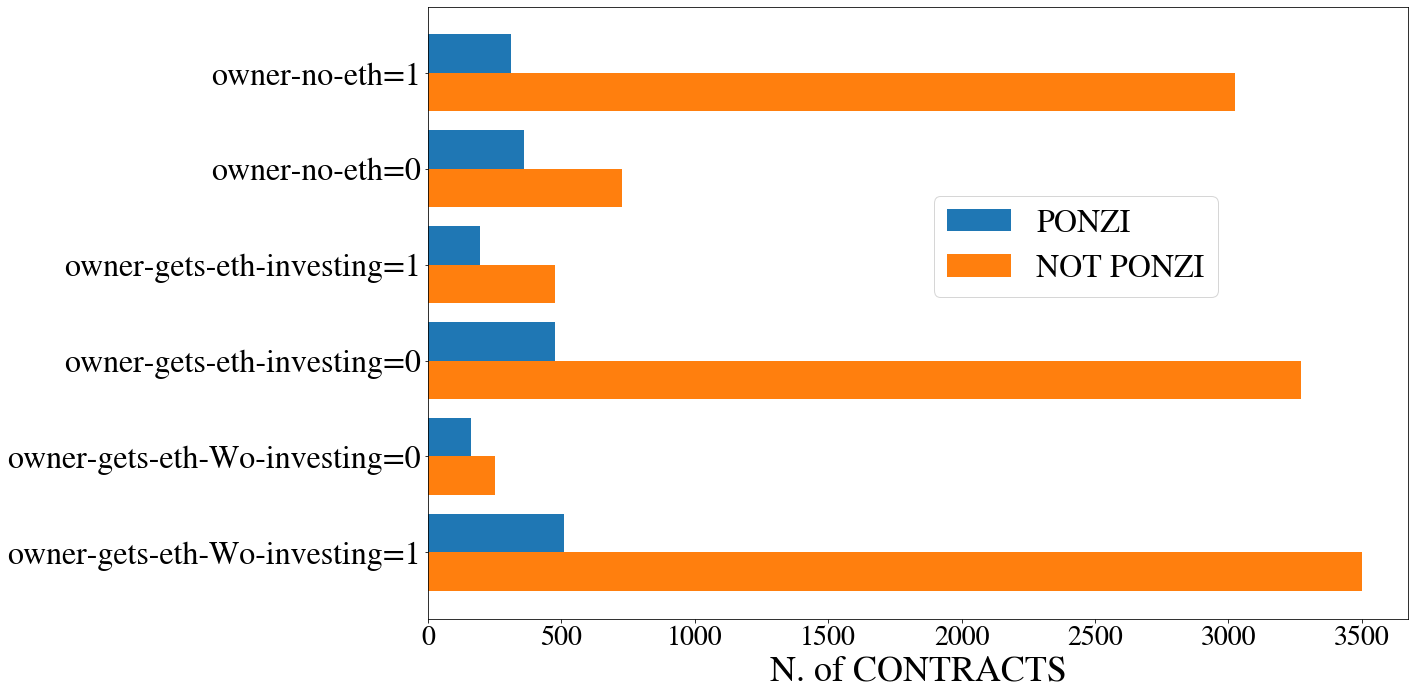

In [52]:
plt.figure(figsize=(20,10))
plt.barh(y=range(0,len(gbs[gbs.target==1])),width = gbs[gbs.target==1].address, height =0.4,align='edge',label='PONZI')
plt.barh(y=range(0,len(gbs[gbs.target==0])),width = gbs[gbs.target==0].address, height =-0.4,align='edge',label='NOT PONZI')
plt.legend(loc='best',fontsize=32,bbox_to_anchor=(0.5,0.5))
plt.yticks([0,1,2,3,4,5],['owner-gets-eth-Wo-investing=1','owner-gets-eth-Wo-investing=0','owner-gets-eth-investing=0','owner-gets-eth-investing=1','owner-no-eth=0','owner-no-eth=1'],fontsize=32)
plt.xticks(fontsize=28)
plt.xlabel('N. of CONTRACTS',fontsize=36)
plt.tight_layout()
# plt.savefig('binary_features.png')